# Notebooks: Number of views per vote
I thought it would be interesting to take a quick look at the distribution of the number views that a notebook receives for each upvote earned. We can see from the plot below that the modal class is around **40 views per vote**, in other words typically only around **2.5%** of the time does a viewer decide that a notebook is worthy their vote. 

### Update (September 2020):
I have re-ran this notebook using the latest data, and in the three months since the creation of this notebook there has been a slight change in voting habits. There is now a plateau of votes between **10-40 views per vote**. Still, in the most optimistic of cases only **10%** of the time does a viewer decide that a notebook is worthy their vote. (One can see the original plot [here](https://www.kaggle.com/carlmcbrideellis/notebooks-number-of-views-per-vote?scriptVersionId=34895828)).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

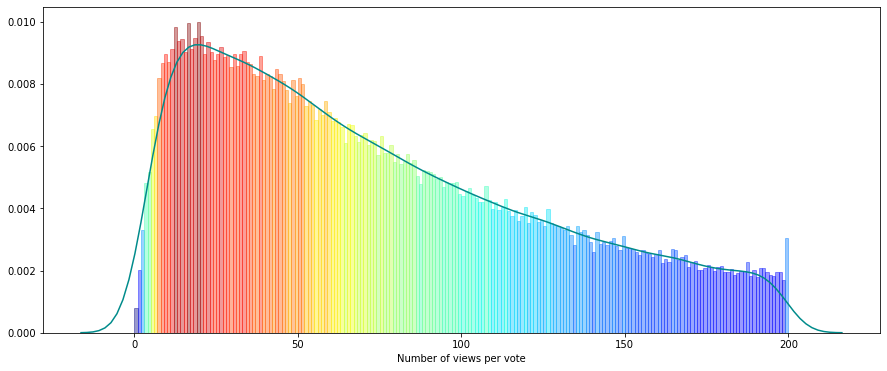

In [2]:
# read in the csv file containing the data
kernels = pd.read_csv('../input/meta-kaggle/Kernels.csv')

# firstly let us remove our friend the Kaggle Kerneler, whose user Id is 2080166, from all the data:
kernels = kernels[kernels.AuthorUserId != 2080166]

# make a new column which is the ratio of views to votes for each notebook
kernels['views_per_vote'] = kernels['TotalViews']/kernels['TotalVotes']

# Some notebooks have 0 votes, and division by 0 results in inf: change these to a nan
kernels['views_per_vote'] = kernels['views_per_vote'].replace([np.inf, -np.inf], np.nan)
# now drop all the nan rows
kernels['views_per_vote'].dropna(inplace=True)

# finally make a histogram plot of this new column, 
# we shall arbitrarily set the cut off at 200 views per vote
plt.figure(figsize = (15,6))
ax = sns.distplot(kernels['views_per_vote'], 
             bins=200, 
             kde_kws={"clip":(0,200)}, 
             hist_kws={"range":(0,200)},
             color='darkcyan', 
             axlabel="Number of views per vote");
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.show();

### Possible interpretations:

Classes to the left of the peak could correspond to notebooks that have obtained votes with relatively few views. 
One interpretation of this is that these may be notebooks that are particularly good or interesting, and gain votes quickly. 

Classes to the far right of the peak have a lot of views but have relatively few votes:
* These could correspond to either notebooks that are perhaps somehow less interesting and have been on kaggle for quite some time, accumulating views but not votes. 
* They could also correspond to notebooks that have been the subject of effective marketing campaigns by the authors, resulting in many views, but in the end did not pick up the hoped-for votes.
* Another interpretation is that they correspond to *"platinum"* notebooks, that went 'gold' along time ago; they  regularly receive  a lot of views, but people may no longer feel so much need to add their own vote.

### Conclusion: 
We should really develop more of a habit of voting for the work of our fellow data scientists: we have seen that on average only 10% of the readers actually upvote the notebook they read, and I find it very hard to believe that 90% of the notebooks one reads on kaggle are not worth voting for!

# Notebooks: Number of days per vote
I also thought it would be interesting to see how often notebooks get votes by calculating the ratio of the number of days since a notebook was made public, divided by the total number of votes. (Note: I remove notebooks that are less than a month old from the calculation to improve the statistics).

In [3]:
# first let us remove our friend the Kaggle Kerneler, whose user Id is 2080166, from the data:
#kernels = kernels[kernels.AuthorUserId != 2080166]

# convert the "MadePublicDate" column to a datetime
kernels['MadePublicDate'] = kernels['MadePublicDate'].apply(pd.to_datetime)
# make a 'days since' column for the number of days since going Public
date_today = pd.to_datetime('today')
kernels['days_since'] = (date_today - kernels['MadePublicDate']).dt.days
# now drop the kernels that are less than a 'month' (say 30 days) old
kernels.drop(kernels.index[kernels['days_since'] <= 30], inplace = True)
# now calculate the number of days that have passed between each vote for each kernel since going Public
kernels['days_per_vote'] = kernels['days_since']/kernels['TotalVotes']

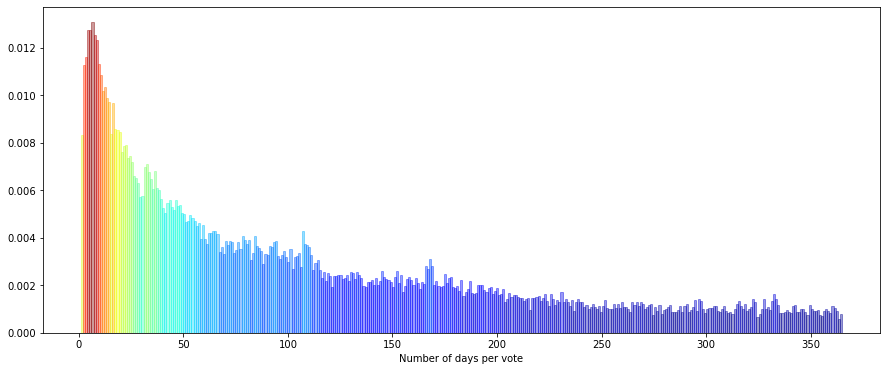

In [4]:
# now plot a histogram (arbitrarily set the cut off at 1 year)
plt.figure(figsize = (15,6))
ax = sns.distplot(kernels['days_per_vote'], 
             bins=365,
             kde_kws={"clip":(1,365)}, 
             hist_kws={"range":(1,365)},
             color='darkcyan', 
             axlabel="Number of days per vote");
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.show();

From the histogram we can see that there are a number of very popular notebooks that get upvoted every few days (those to the left in red), but the vast majority do not. The distribution has a long tail, and here I have only plotted the data for up to one year(!)

Let us calculate the percentage of notebooks get less than one vote a month:

In [5]:
total_number_of_kernels = kernels['days_per_vote'].shape[0]
kernels_that_take_month_per_vote =  kernels.index[kernels['days_per_vote'] >= 30].shape[0]
percentage = (100.0/total_number_of_kernels)*kernels_that_take_month_per_vote
print("percentage =",percentage)

percentage = 91.95973802059378


**Result: More than 90% of public notebooks get less than 1 vote per month.**